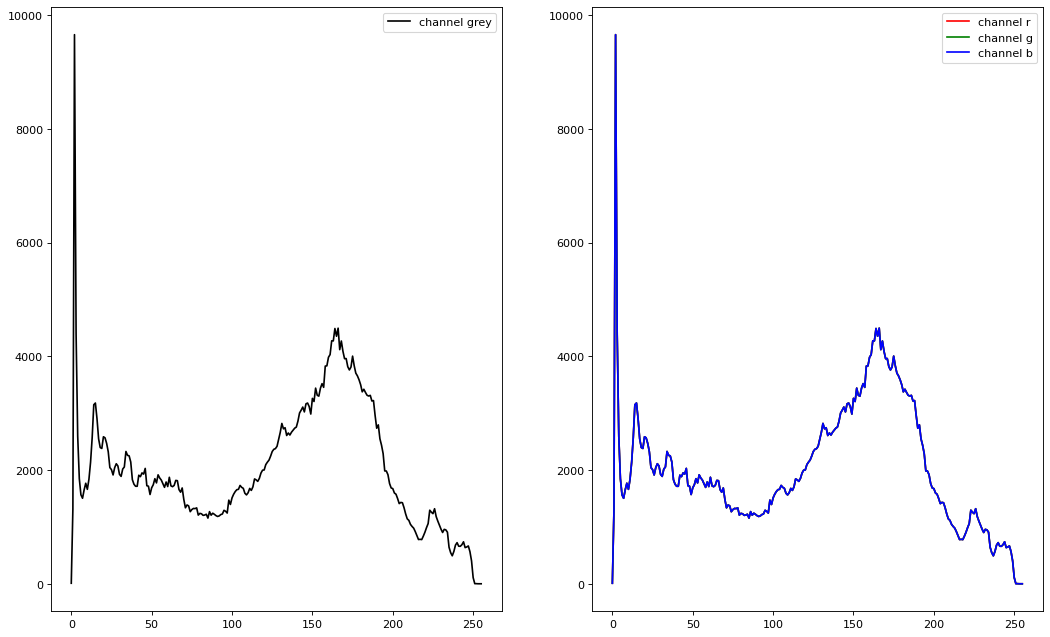

Resolution is 427 X 640


In [2]:
# Task 1
import matplotlib.pyplot as plt
import matplotlib
import cv2 as cv

import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw

file_path = filedialog.askopenfilenames()

plt.figure(figsize=(16, 10), dpi=80)
image_path = 'Images and Videos/Dog.png'
ax_grey = plt.subplot(1,2,1)  # row 1, col 1
ax_rgb  = plt.subplot(1,2,2)  # row 1, col 2


image_bgr = cv.imread(image_path)    # default BGR 

image_bgr = cv.resize(image_bgr, (1920//2, 1080//2),cv.INTER_AREA) ## resing to fit 4 pics in screen 

image_grey = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)# BGP --> Grey 
image_rgb = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB) # BGR --> RGB

#grayscale histogram 
gray_hist = cv.calcHist(images=[image_grey], channels=[0], mask=None, histSize=[256], ranges=[0,256])

ax_grey.set_title='Gray Scale'


ax_grey.plot(gray_hist, color='black', label='channel grey')
ax_grey.legend()

# bgr histogram 
ax_grey.set_title='RGB Scale'


channels = ('r','g', 'b')
for i, color in enumerate(channels):
    bgr_hist = cv.calcHist(images=[image_bgr], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    ax_rgb.plot(bgr_hist, color=color, label = f'channel {color}')
    ax_rgb.legend()

plt.show()

image = cv.imread('Images and Videos/Dog.png')    # read the image 
cv.waitKey(0)

height, width, depth = image.shape
print(f'Resolution is {height} X {width}')

In [3]:
# Task 2
import cv2 as cv
import numpy as np
from cv2 import INTER_LINEAR
from cv2 import INTER_CUBIC

video = input("Enter'live feed' or 'video file': ")
scale = input("Enter a scale factor from 0-1: ")
interpolation = input("Enter a number from 1-3 for: 1 = Inter_Area, 2 = Linear, 3 = Cubic: ")

def scale_frame(frame, scale):
    # height and weight is read 
    height = (frame.shape[0])
    width = (frame.shape[1])


    if interpolation == '1':
        return cv.resize(frame, dsize = (height, width), interpolation=cv.INTER_AREA) # rescaling
    elif interpolation == '2':
        return cv.resize(frame), (int(width), int(height)), interpolation==cv.INTER_LINEAR,
    elif interpolation == '3':
        return cv.resize(frame), (int(width), int(height)), interpolation==cv.INTER_CUBIC

if video == 'live feed':
    video_location = 0
    def read_video(video_location, scale, side_by_side=False):

        if scale != 1 and scale != 0:
            try:
                capture = cv.VideoCapture(video_location)
                while True:
                    isTrue, frame = capture.read()
                    scaled_frame = scale_frame(frame, scale)  # each frame is scaled  

                    cv.imshow('Scaled', scaled_frame)
                    if side_by_side:
                        cv.imshow('Original', frame)

                    if cv.waitKey(20) & 0XFF == ord('x'):
                        break
                capture.release()


            finally:
                cv.destroyAllWindows()
        else:
            print(f'This scale factor is not valid')
    read_video(video_location=0,scale=scale,side_by_side=False)

elif(video == 'video file'):
    video_location = input("Enter the video file path ")
    def read_video(source, scale, side_by_side=False):
        if scale != 1 and scale > 0:
            try:
                capture = cv.VideoCapture(source)
                while True:
                    isTrue, frame = capture.read()
                    scaled_frame = scale_frame(frame, scale)  # each frame is scaled 

                    cv.imshow('scaled video', scaled_frame)
                    if side_by_side:
                        cv.imshow('original video', frame)

                    if cv.waitKey(20) & 0XFF == ord('x'):
                        break
                capture.release()
            except:
                print('error')
            finally:
                cv.destroyAllWindows()
        else:
            print(f'This scale factor is not valid')

In [7]:
# Task 3 - framerate, brightness, contrast, saturation
from IPython.display import clear_output

def show_details(capture):   # prints the basic attributes 
    clear_output(wait=True)  # clear the notebook cell after printing 
    
    print(f"CAP_PROP_FPS        \t: {capture.get(cv.CAP_PROP_FPS)}")
    print(f"CAP_PROP_BRIGHTNESS \t: {capture.get(cv.CAP_PROP_BRIGHTNESS)}")
    print(f"CAP_PROP_CONTRAST   \t: {capture.get(cv.CAP_PROP_CONTRAST)}")
    print(f"CAP_PROP_SATURATION \t: {capture.get(cv.CAP_PROP_SATURATION)}")

def show_video(source): 
    capture = cv.VideoCapture(source)
    while True:
        isTrue, frame = capture.read()
        show_details(capture)   # display the capture details
        cv.imshow('Window', frame)
        if cv.waitKey(20) & 0xFF == ord('x'): # press 'x' to exit the window
            break
    capture.release()
    cv.destroyAllWindows()
show_video(source=0) # display the live feed

# sourcecode
from IPython.display import clear_output

alter_param = {
    'fps' : 30, 
    'brightness' : 30,
    'contrast' : 20,
    'saturation' : 150,
}

def show_details(capture):   # prints the basic attributes 
    clear_output(wait=True)  # clear the notebook cell after printing 
    print(f"CAP_PROP_FPS        \t: {capture.get(cv.CAP_PROP_FPS)}")
    print(f"CAP_PROP_BRIGHTNESS \t: {capture.get(cv.CAP_PROP_BRIGHTNESS)}")
    print(f"CAP_PROP_CONTRAST   \t: {capture.get(cv.CAP_PROP_CONTRAST)}")
    print(f"CAP_PROP_SATURATION \t: {capture.get(cv.CAP_PROP_SATURATION)}")

def alter_params(capture, alter_param):   # alters the parameters 
    capture.set(cv.CAP_PROP_FPS, alter_param['fps'])
    capture.set(cv.CAP_PROP_BRIGHTNESS, alter_param['brightness'])
    capture.set(cv.CAP_PROP_CONTRAST, alter_param['contrast'])
    capture.set(cv.CAP_PROP_SATURATION, alter_param['saturation'])
    return capture

def show_video(source):    # renders the video stream 
    print('Preparing capture... ')
    try:
        capture = cv.VideoCapture(source)
        capture = alter_params(capture, alter_param) # calling to alter the params
        print('Displaying... ')
        while True:
            isTrue, frame = capture.read()
            show_details(capture)   # calling the capture details 
            cv.imshow('Window', frame)
            if cv.waitKey(20) & 0xFF == ord('x'): # press 'x' to exit
                break
        capture.release()
    except:
        print('Error')
    finally:
        cv.destroyAllWindows()
show_video(source=0)

CAP_PROP_FPS        	: 30.0
CAP_PROP_BRIGHTNESS 	: 30.0
CAP_PROP_CONTRAST   	: 20.0
CAP_PROP_SATURATION 	: 100.0


In [ ]:
# Task 4
import cv2 as cv
import numpy as np

def split_video_channels(mirror=False):
    cap = cv.VideoCapture(-1)
    while True:
        ret, frame = cap.read()
        if ret == True:

                frame= cv.flip(frame, 1)

        height, width, layers = frame.shape 

        (B, G, R) = cv.split(frame) # split into RGB channels

        # Text
        cv.rectangle(frame,(350,0),(610,75),(255,255,255),3)
        cv.rectangle(B,(350,0),(575,75),(255,255,255),3)
        cv.rectangle(G,(350,0),(575,75),(255,255,255),3)
        cv.rectangle(R,(350,0),(575,75),(255,255,255),3)

        cv.putText(frame, "Original Channel", (350, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
        cv.putText(B, "Blue Channel", (350, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
        cv.putText(G, "Green Channel", (350, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))
        cv.putText(R, "Red Channel", (350, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255))

        # merging
        zeroImgMatrix = np.zeros(frame.shape[:2], dtype="uint8")
        B = cv.merge([B, zeroImgMatrix, zeroImgMatrix])
        G = cv.merge([zeroImgMatrix, G, zeroImgMatrix])
        R = cv.merge([zeroImgMatrix, zeroImgMatrix, R])

        cv.imshow('Original', mat=frame)
        cv.imshow('Red', R)
        cv.imshow('Green', G)
        cv.imshow('Blue', B)

        if cv.waitKey(1) & 0xFF == ord('x'):  # 'x' key closes the window
            break
    cap.release()
    cv.destroyAllWindows()
def main():
    split_video_channels(mirror=True)
if __name__ == '__main__':
    main()